In [258]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_name = "gym_members_exercise_tracking.csv"
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset") + "/" + dataset_name
df = pd.read_csv(path)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [259]:
df = df.drop('Experience_Level', axis=1)
df = df.drop('Workout_Type', axis=1)
df = df.drop('Workout_Frequency (days/week)', axis=1)

In [260]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [261]:
df.head(100)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...
95,59,0,54.6,1.57,164,169,64,0.58,441.0,29.2,2.3,22.15
96,56,1,129.0,1.78,194,126,64,1.29,805.0,27.1,2.7,40.71
97,58,1,103.5,1.66,172,168,61,1.33,1106.0,24.6,3.1,37.56
98,45,0,59.4,1.51,169,142,65,1.15,735.0,33.1,1.9,26.05


# Проверим пустые значения

In [262]:
df.isnull().sum()

Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Max_BPM                     0
Avg_BPM                     0
Resting_BPM                 0
Session_Duration (hours)    0
Calories_Burned             0
Fat_Percentage              0
Water_Intake (liters)       0
BMI                         0
dtype: int64

Отсутвующих значений нет



# Попробуем найти очевидные выбросы

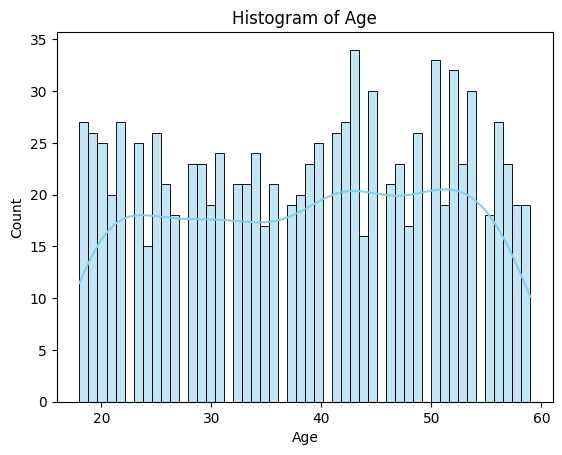

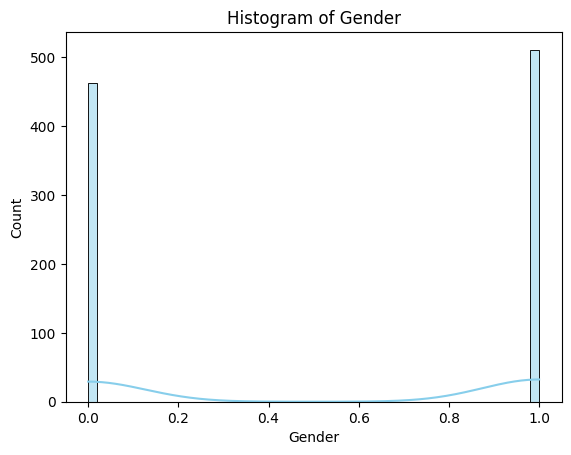

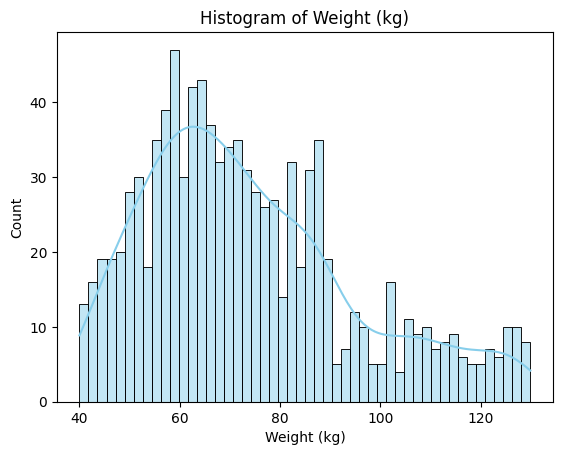

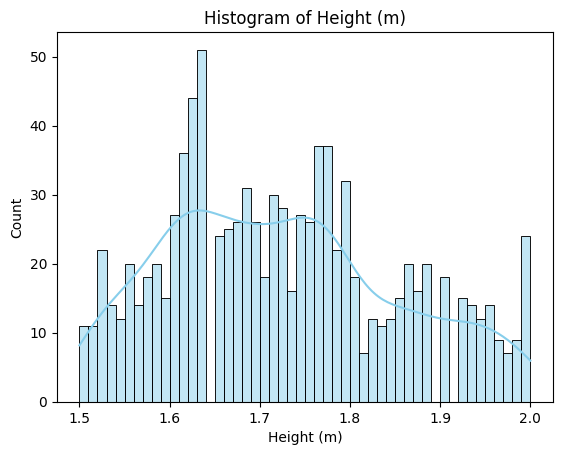

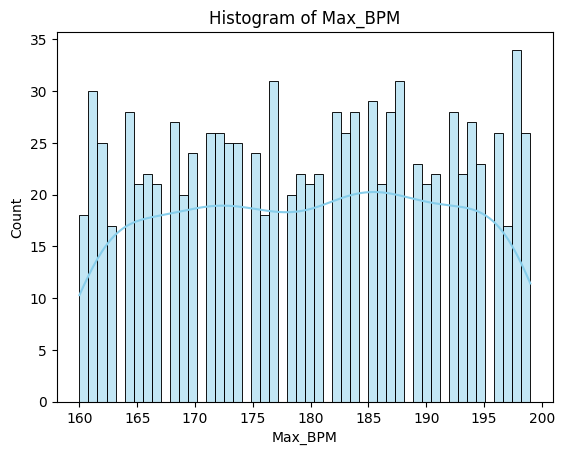

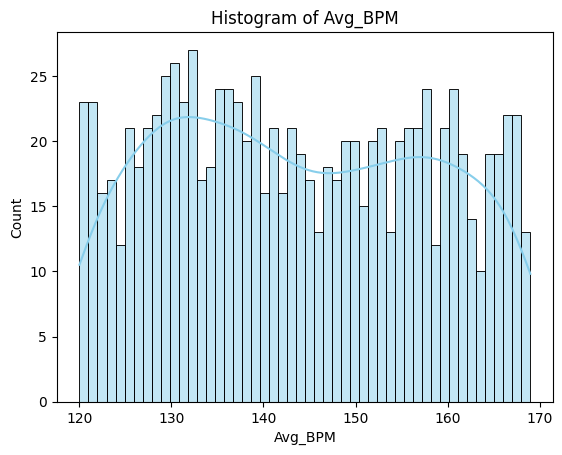

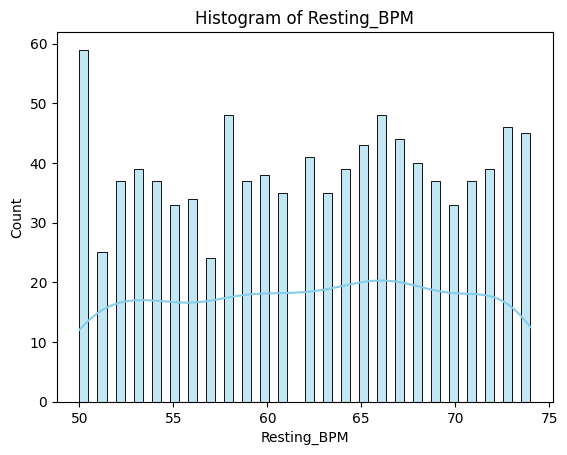

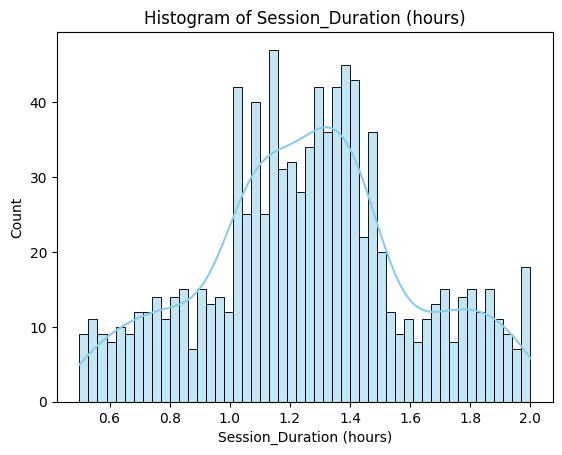

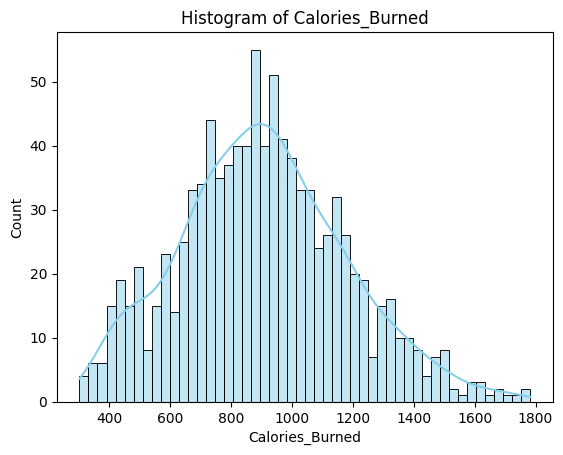

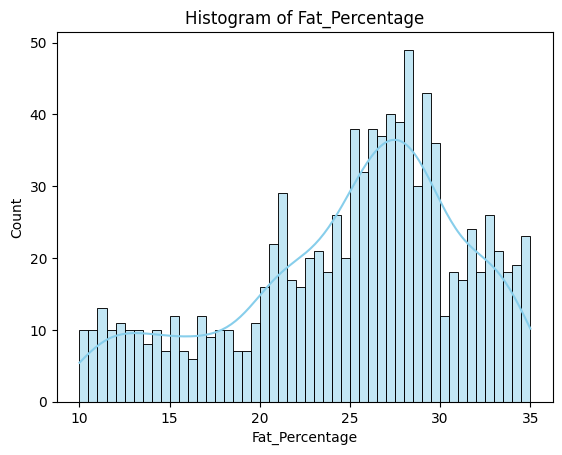

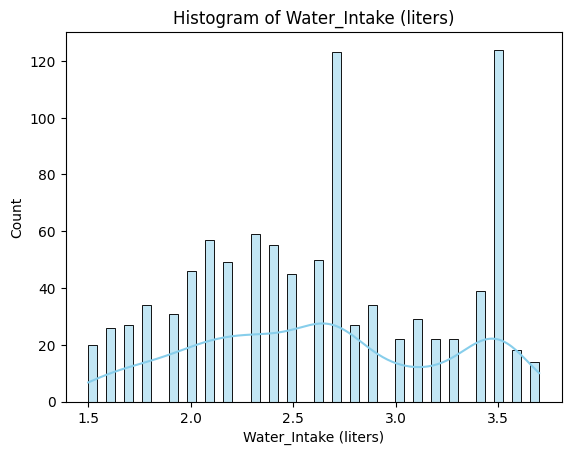

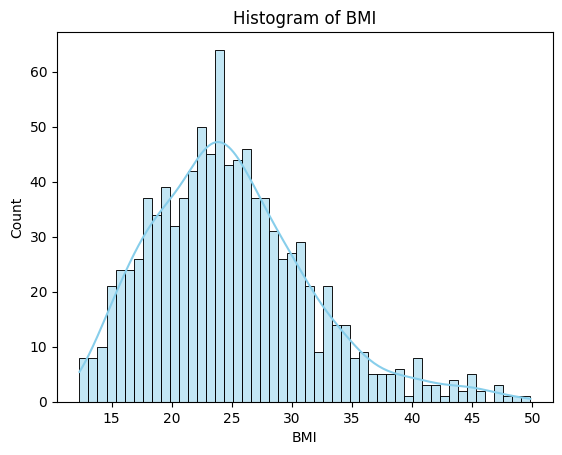

In [263]:
for label in df.columns:
    sns.histplot(df[label], bins=50, kde=True, color="skyblue")
    plt.xlabel(label)
    plt.title(f'Histogram of {label}')
    plt.show()

Проверим выбросы при помощи boxplot

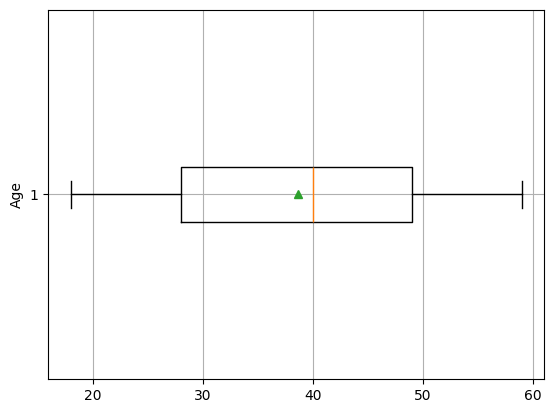

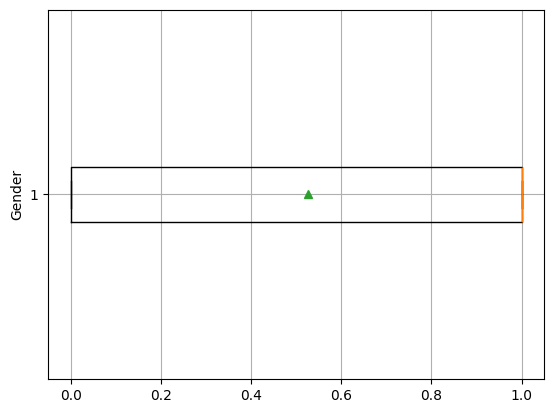

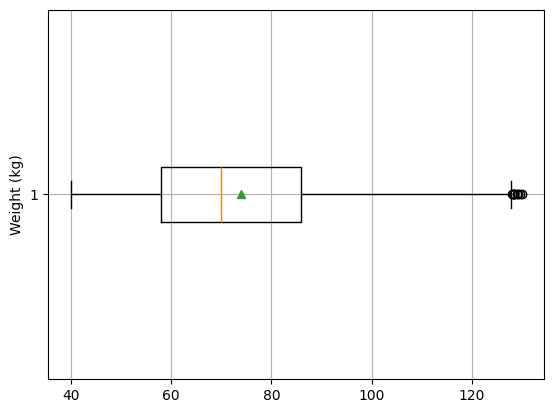

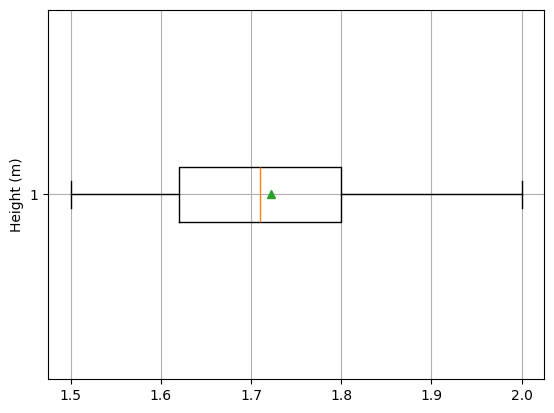

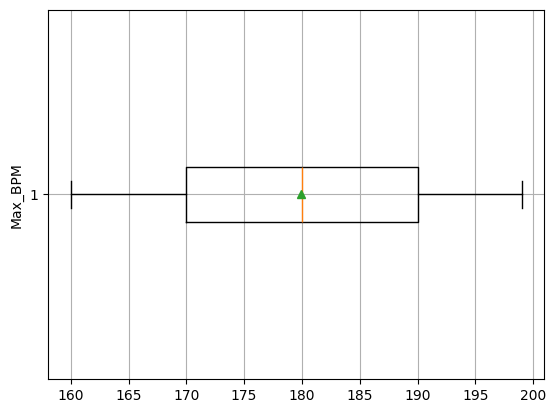

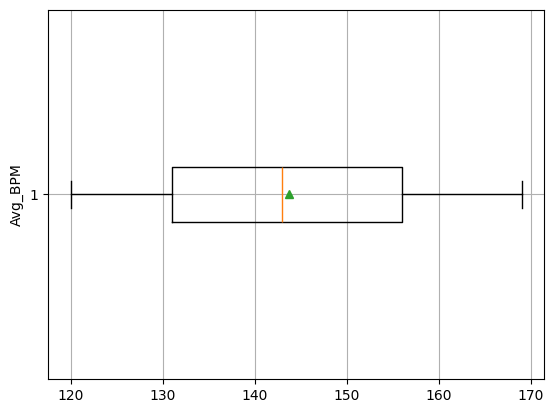

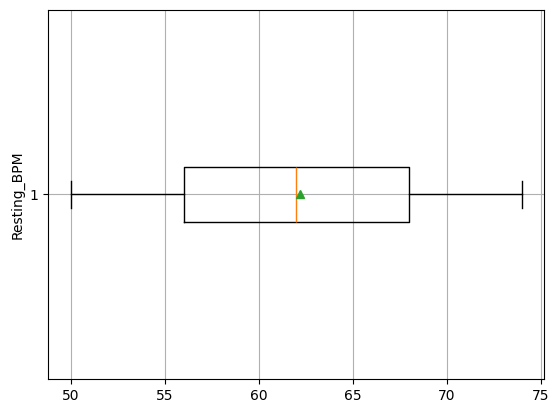

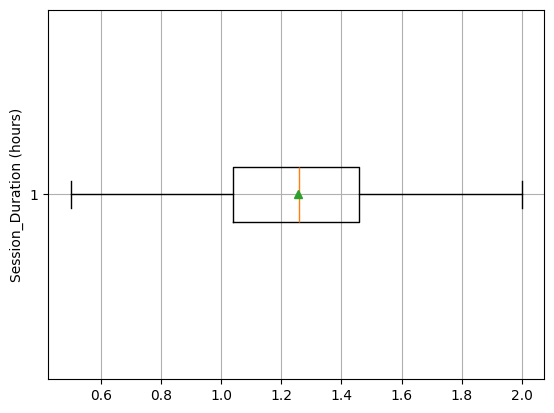

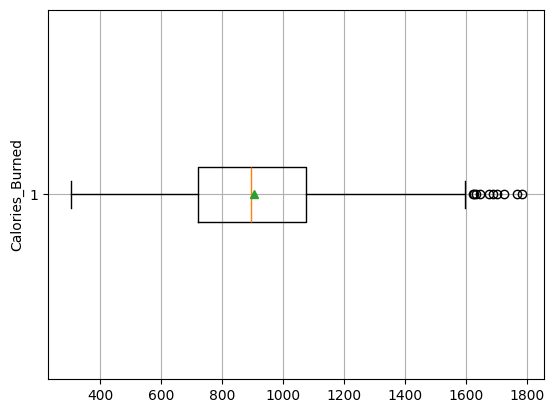

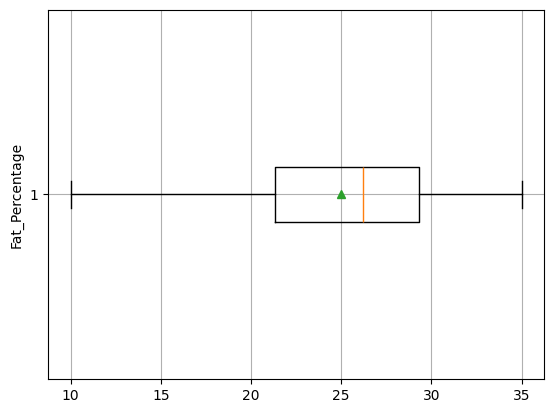

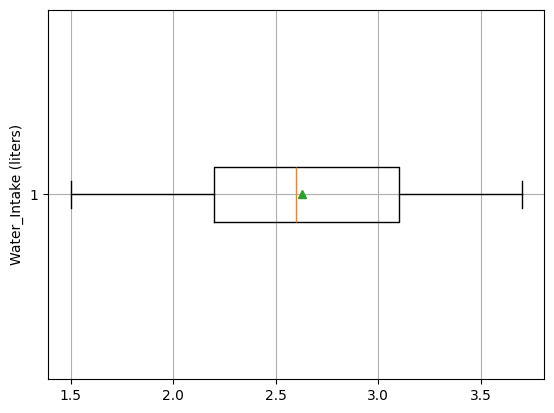

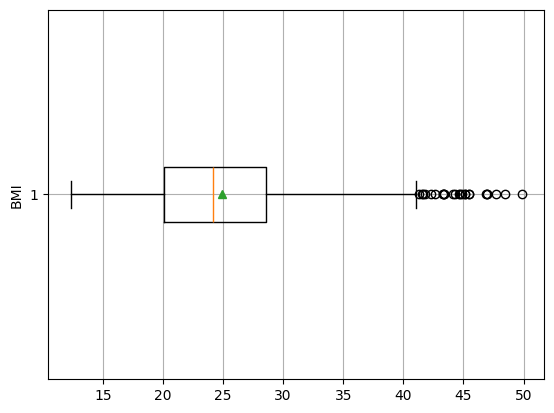

In [264]:
for column in df.columns:
    plt.boxplot(df[column], showmeans=True, vert=False)
    plt.ylabel(column)
    plt.grid()
    plt.show()


Очевидных выбросов не обнаружено, даже несмотря на показатели boxplot, так как в случае с BMI можно опираться на показатели диаграммы, которые показывают, что распределение BMI - ассиметрично, из-за этого данные boxplot демонстрируют выбросы в правой стороне.

# Стандартизация

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
scaler = StandardScaler()

In [267]:
standardized_data = scaler.fit_transform(df)
df = pd.DataFrame(standardized_data, columns=df.columns)

In [268]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,1.422343,0.950847,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.794278
1,0.600965,-1.051694,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,1.064652
2,-0.548964,-1.051694,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,-0.030361
3,-1.123928,0.950847,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.976669
4,-0.056137,0.950847,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-1.580503
5,1.422343,-1.051694,-0.747982,-0.333555,-1.031607,0.853224,1.608153,0.972932,0.772758,-1.514781,0.122330,-0.655224
6,-0.220413,0.950847,-0.167700,-0.020208,-0.510763,1.759923,1.471603,0.681265,1.759909,-0.587701,-0.544488,-0.173058
7,0.108138,-1.051694,-0.196007,-1.665277,0.791348,-0.192966,0.242647,0.039598,-0.038247,0.898824,-1.211307,0.849855
8,-0.877515,0.950847,2.257217,1.703197,0.444118,-1.169411,-1.395960,-0.660402,-0.684115,0.627094,-0.044375,1.115722
9,-0.877515,0.950847,1.318387,0.919831,-0.944799,-0.541697,0.242647,-0.514568,-0.357512,0.754967,0.122330,0.774751


<Axes: >

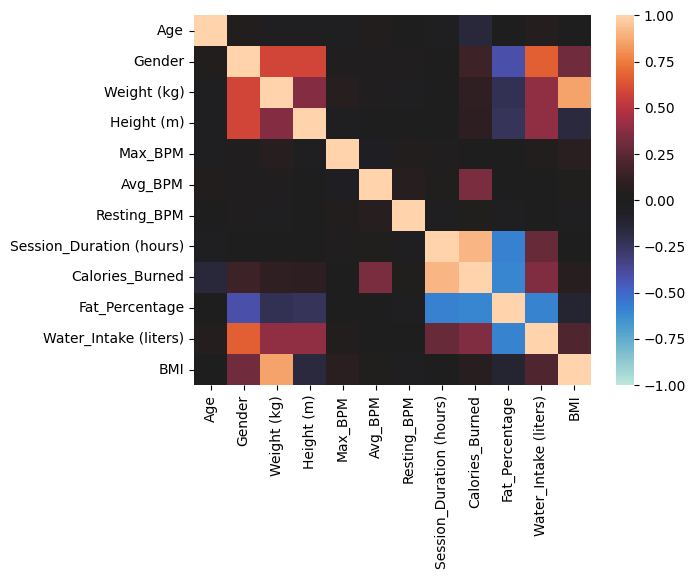

In [269]:
correlation_matrix = df.corr()
correlation_matrix.head()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center= 0)

*Видно, что большинство признаков не имеют линейной зависимости*

# Кластеризация
Так как визуально невозможно определить кол-во кластеров, используем метод локтя. Также можно использовать методы понижения размерностей для выявления кол-ва кластеров визуально

# Понижение размерности для визуализации кластеров

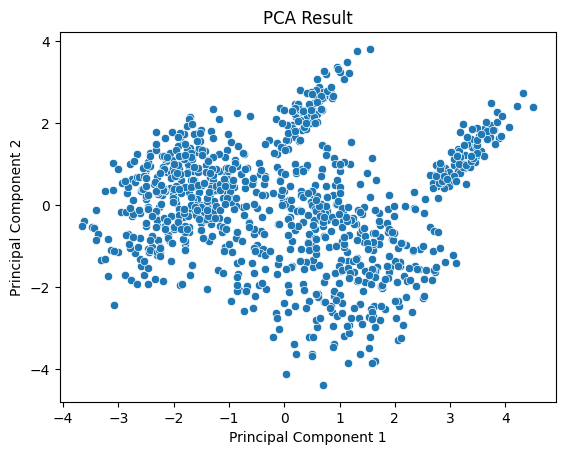

In [270]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')
plt.show()

# Пробуем t-SNE

Попробуем использовать нелинейное понижение размерности

In [271]:
from sklearn.manifold import TSNE

In [272]:
tsne = TSNE(n_components=2, perplexity=5)

In [273]:
tsne_data = tsne.fit_transform(df)

In [274]:
sne_df = pd.DataFrame(tsne_data, columns=['SNE1', 'SNE2'])

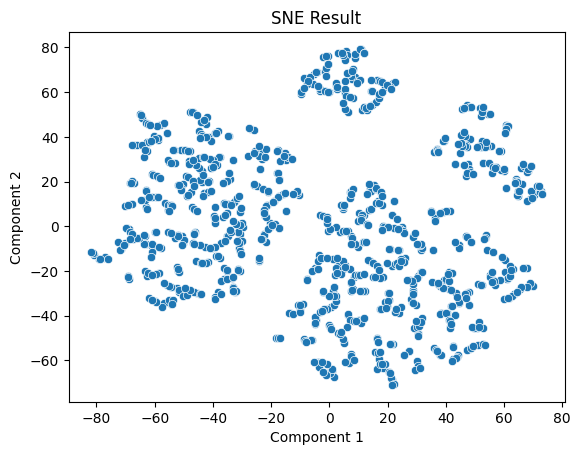

In [275]:
sns.scatterplot(x='SNE1', y='SNE2', data=sne_df)
plt.title('SNE Result')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Визуально можно выделить **4** кластера

# Метод локтя

In [276]:
objects = df.values

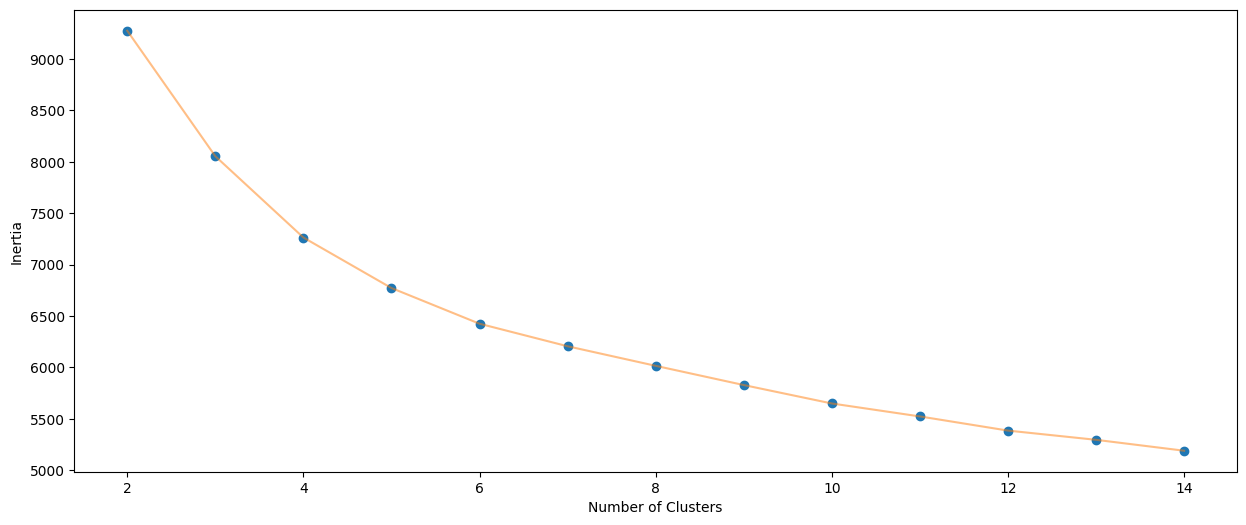

In [277]:
import numpy as np
inertia = []
for num_of_clusters in range(2, 15): # перебираем размер кластеров от 2х до 14
    algorithm = (KMeans(n_clusters = num_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
    algorithm.fit(objects)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 15) , inertia , 'o') 
plt.plot(np.arange(2 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Применим силуэтный анализ

In [278]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avgs = []
for num_of_clusters in range(2, 15):
    
    # intialise kmeans
    algorithm = (KMeans(n_clusters = num_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
    algorithm.fit(objects)
    
    cluster_labels = algorithm.labels_
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avgs.append(silhouette_avg)


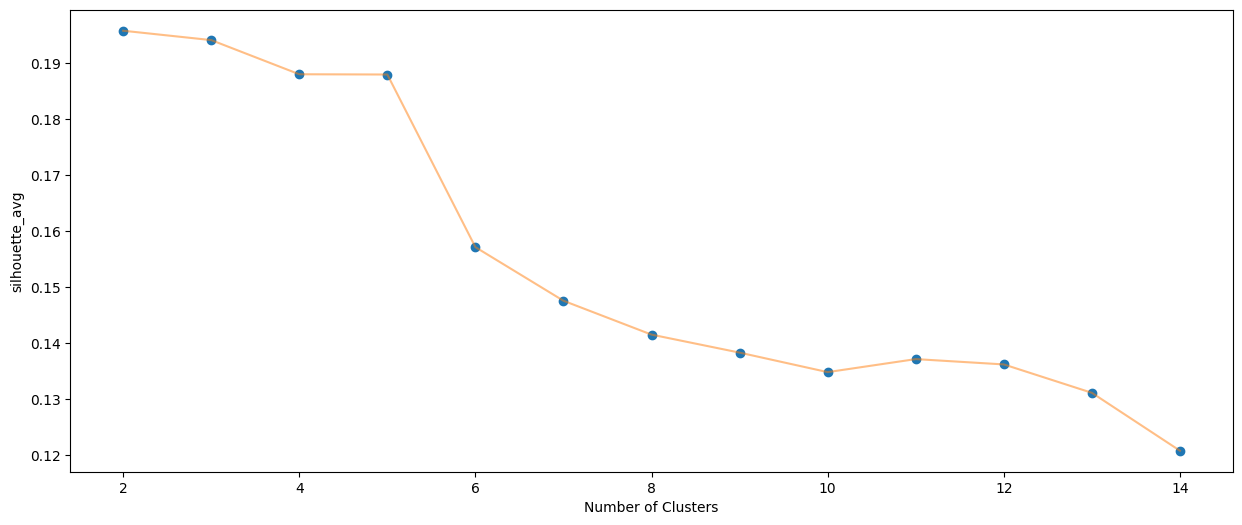

In [279]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 15) , silhouette_avgs , 'o') 
plt.plot(np.arange(2 , 15) , silhouette_avgs, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('silhouette_avg')
plt.show()

Основываясь на всех методах выбора размера кластера, возьмем значение **5**

In [280]:
number_of_clusters = 5 

In [281]:
algorithm = (KMeans(n_clusters = number_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(objects)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

df['cluster'] = labels

In [282]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI,cluster
0,1.422343,0.950847,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.794278,0
1,0.600965,-1.051694,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,1.064652,4
2,-0.548964,-1.051694,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,-0.030361,4
3,-1.123928,0.950847,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.976669,3
4,-0.056137,0.950847,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-1.580503,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.950847,0.624880,0.136465,0.617733,0.992716,0.652299,0.914598,1.682845,-2.393908,1.455967,0.579482,0
969,-1.123928,0.950847,-0.342257,-0.881911,0.357311,1.550685,-0.849757,0.360432,1.301196,0.003713,0.622444,0.116842,3
970,1.668756,-1.051694,-0.634756,0.293138,1.225384,-1.657634,-1.259409,1.352098,0.086523,-0.987304,0.122330,-0.812942,1
971,-0.548964,0.950847,2.478951,0.841495,1.572614,0.155764,-0.030454,-0.456235,-0.082284,0.515205,-0.877898,1.926843,2


# Визуализация кластеры, используя только 3 признака

In [283]:
import plotly.graph_objs as go
import plotly.offline as py

py.init_notebook_mode(connected=True)

# Убедимся, что cluster числовой
df['cluster'] = df['cluster'].astype('category').cat.codes

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Avg_BPM'],
    z=df['Calories_Burned'],
    mode='markers',
    marker=dict(
        color=df['cluster'], 
        size=2,
        line=dict(
            color=df['cluster'],
            width=6
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(
            title='Age',
            dtick=50,          
            tickfont=dict(
                size=1      
            )
        ),
        yaxis=dict(
            title='Avg_BPM',
            dtick=50,           
            tickfont=dict(
                size=1     
            )
        ),
        zaxis=dict(
            title='Calories_Burned',
            dtick=50,           
            tickfont=dict(
                size=10     
            )
        )
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


# Визуализация кластеры, используя только 2 признака

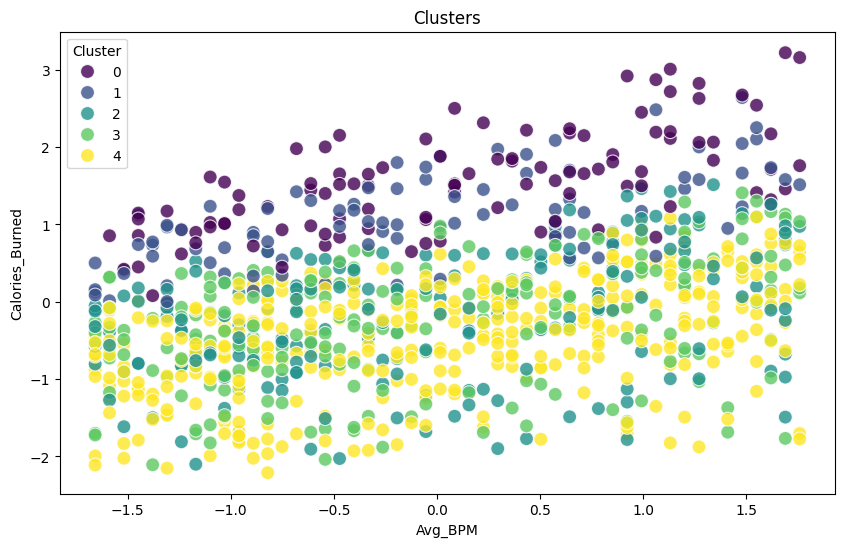

In [284]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Avg_BPM',                
    y='Calories_Burned',        
    hue='cluster',              
    palette='viridis',          
    s=100,                      
    alpha=0.8                   
)

plt.title('Clusters')
plt.xlabel('Avg_BPM')
plt.ylabel('Calories_Burned')
plt.legend(title='Cluster') 
plt.show()


# Визуализация с понижением размерности до 2 t-SNE

In [257]:
df_sne = df.iloc[:, :-1]

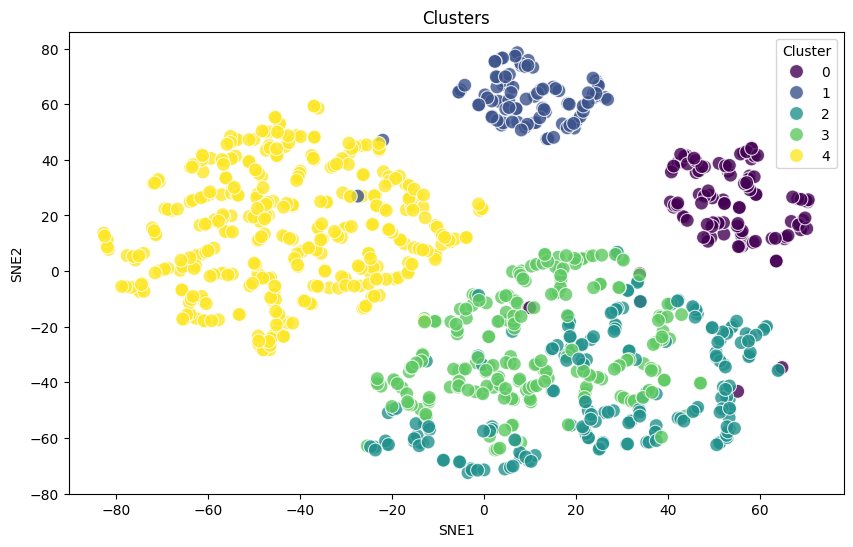

In [285]:
tsne = TSNE(n_components=2, perplexity=5)
tsne_data = tsne.fit_transform(df_sne)
sne_df = pd.DataFrame(tsne_data, columns=['SNE1', 'SNE2'])
sne_df['cluster'] = df['cluster']
# sns.scatterplot(x='SNE1', y='SNE2', data=sne_df)
# plt.title('SNE Result')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sne_df,
    x='SNE1',                
    y='SNE2',        
    hue='cluster',              
    palette='viridis',          
    s=100,                      
    alpha=0.8                   
)

plt.title('Clusters')
plt.xlabel('SNE1')
plt.ylabel('SNE2')
plt.legend(title='Cluster') 
plt.show()